# MLP와 CNN 모델 비교

지시사항
MLP 모델을 구성하는 함수 build_mlp_model을 완성하세요. 앞선 실습과 동일한 값으로 설정하면 됩니다.
MLP 모델이므로 2차원 이미지를 1차원으로 변형해야 합니다. 맨 먼저 Flatten Layer를 추가하세요.
이후 마지막을 제외한 각 Dense Layer의 노드 개수는 아래와 같습니다. 모두 활성화 함수는 ReLU로 설정하세요.
4096개
1024개
256개
64개
마지막 Layer는 활성화 함수가 Softmax이고 노드 개수는 num_classes 개인 Dense Layer입니다.

CNN 모델을 구성하는 함수 build_cnn_model을 완성하세요. 모델 Layer 구성은 아래와 같습니다. 모든 Conv2D Layer의 활성화 함수는 ReLU로 설정하세요.
layers.Conv2D
커널 개수: 16개
커널 크기: (3, 3)
padding: "same"
input_shape=img_shape
layers.Conv2D
커널 개수: 32개
커널 크기: (3, 3)
padding: "same"
layers.MaxPool2D
이미지 사이즈가 2배로 줄도록 설정하세요.
layers.Conv2D
커널 개수: 64개
커널 크기: (3, 3)
padding: "same"
strides: (2, 2)
layers.Conv2D
커널 개수: 64개
커널 크기: (3, 3)
padding: "same"
strides: (2, 2)
layers.MaxPool2D
이미지 사이즈가 2배로 줄도록 설정하세요.
layers.Flatten
layers.Dense
노드 개수: 128개
활성화 함수: ReLU
layers.Dense
노드 개수: num_classes
활성화 함수: Softmax

run_model 함수에서 optimizer는 Adam으로 설정하세요. Learning rate은 0.001로 설정하세요.

run_model 함수에서 모델의 손실 함수와 평가 지표(metrics)를 아래와 같이 설정하세요. optimizer는 2번에서 불러온 것을 사용합니다.
손실 함수: sparse_categorical_crossentropy
평가 지표(metrics): "accuracy"

run_model 함수에서 모델 학습을 위한 hyperparameter를 아래와 같이 설정하세요.
epochs=epochs
batch_size=64
validation_split=0.2
shuffle=True
verbose=2

In [ ]:
from elice_utils import EliceUtils

elice_utils = EliceUtils()

import tensorflow as tf
from tensorflow.keras import layers, Sequential, Input
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

SEED = 2021

def load_cifar10_dataset():
    train_X = np.load("./dataset/cifar10_train_X.npy")
    train_y = np.load("./dataset/cifar10_train_y.npy")
    test_X = np.load("./dataset/cifar10_test_X.npy")
    test_y = np.load("./dataset/cifar10_test_y.npy")
    
    train_X, test_X = train_X / 255.0, test_X / 255.0
    
    return train_X, train_y, test_X, test_y
    
def build_mlp_model(img_shape, num_classes=10):
    model = Sequential()

    model.add(Input(shape=img_shape))
    
    # TODO: [지시사항 1번] MLP 모델을 완성하세요.
    model.add(None)

    return model

def build_cnn_model(img_shape, num_classes=10):
    model = Sequential()

    # TODO: [지시사항 2번] CNN 모델을 완성하세요.
    model.add(None)

    return model
    
def plot_history(hist):
    train_loss = hist.history["loss"]
    train_acc = hist.history["accuracy"]
    valid_loss = hist.history["val_loss"]
    valid_acc = hist.history["val_accuracy"]
    
    fig = plt.figure(figsize=(8, 6))
    plt.plot(train_loss)
    plt.plot(valid_loss)
    plt.title('Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Train', 'Valid'], loc='upper right')
    plt.savefig("loss.png")
    elice_utils.send_image("loss.png")
    
    fig = plt.figure(figsize=(8, 6))
    plt.plot(train_acc)
    plt.plot(valid_acc)
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.savefig("accuracy.png")
    elice_utils.send_image("accuracy.png")
    
def run_model(model, train_X, train_y, test_X, test_y, epochs=10):
    # TODO: [지시사항 3번] Adam optimizer를 설정하세요.
    optimizer = None
    
    model.summary()
    # TODO: [지시사항 4번] 모델의 optimizer, 손실 함수, 평가 지표를 설정하세요.
    None
    
    # TODO: [지시사항 5번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = None
    
    plot_history(hist)
    test_loss, test_acc = model.evaluate(test_X, test_y)
    print("Test Loss: {:.5f}, Test Accuracy: {:.3f}%".format(test_loss, test_acc * 100))
    
    return optimizer, hist

def main():
    tf.random.set_seed(SEED)
    np.random.seed(SEED)
    
    train_X, train_y, test_X, test_y = load_cifar10_dataset()
    img_shape = train_X[0].shape

    mlp_model = build_mlp_model(img_shape)
    cnn_model = build_cnn_model(img_shape)
    
    print("=" * 30, "MLP 모델", "=" * 30)
    run_model(mlp_model, train_X, train_y, test_X, test_y)
    
    print()
    print("=" * 30, "CNN 모델", "=" * 30)
    run_model(cnn_model, train_X, train_y, test_X, test_y)

if __name__ == "__main__":
    main()

============================== MLP 모델 ==============================


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 4096)           │    12,587,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,061,834 (65.09 MB)

 Trainable params: 17,061,834 (65.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
94/94 - 4s - 44ms/step - accuracy: 0.1500 - loss: 2.4704 - val_accuracy: 0.1927 - val_loss: 2.1191
Epoch 2/10
94/94 - 4s - 38ms/step - accuracy: 0.2255 - loss: 2.0481 - val_accuracy: 0.2513 - val_loss: 1.9654
Epoch 3/10
94/94 - 4s - 38ms/step - accuracy: 0.2917 - loss: 1.9229 - val_accuracy: 0.3133 - val_loss: 1.8990
Epoch 4/10
94/94 - 4s - 40ms/step - accuracy: 0.3243 - loss: 1.8505 - val_accuracy: 0.3267 - val_loss: 1.8326
Epoch 5/10
94/94 - 4s - 38ms/step - accuracy: 0.3517 - loss: 1.7975 - val_accuracy: 0.3420 - val_loss: 1.7893
Epoch 6/10
94/94 - 4s - 38ms/step - accuracy: 0.3623 - loss: 1.7593 - val_accuracy: 0.3513 - val_loss: 1.7829
Epoch 7/10
94/94 - 3s - 37ms/step - accuracy: 0.3780 - loss: 1.7138 - val_accuracy: 0.3573 - val_loss: 1.7876
Epoch 8/10
94/94 - 4s - 39ms/step - accuracy: 0.3988 - loss: 1.6807 - val_accuracy: 0.3693 - val_loss: 1.7876
Epoch 9/10
94/94 - 4s - 38ms/step - accuracy: 0.3977 - loss: 1.6577 - val_accuracy: 0.3827 - val_loss: 1.7434
Epoch 10/1

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,946 (406.04 KB)

 Trainable params: 103,946 (406.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
94/94 - 4s - 43ms/step - accuracy: 0.2165 - loss: 2.0829 - val_accuracy: 0.3340 - val_loss: 1.8768
Epoch 2/10
94/94 - 4s - 39ms/step - accuracy: 0.3508 - loss: 1.7724 - val_accuracy: 0.3920 - val_loss: 1.6470
Epoch 3/10
94/94 - 4s - 39ms/step - accuracy: 0.4032 - loss: 1.6285 - val_accuracy: 0.4080 - val_loss: 1.5560
Epoch 4/10
94/94 - 4s - 39ms/step - accuracy: 0.4365 - loss: 1.5359 - val_accuracy: 0.4253 - val_loss: 1.5089
Epoch 5/10
94/94 - 4s - 39ms/step - accuracy: 0.4737 - loss: 1.4533 - val_accuracy: 0.4347 - val_loss: 1.5100
Epoch 6/10
94/94 - 4s - 39ms/step - accuracy: 0.5080 - loss: 1.3568 - val_accuracy: 0.4367 - val_loss: 1.4886
Epoch 7/10
94/94 - 4s - 39ms/step - accuracy: 0.5327 - loss: 1.2827 - val_accuracy: 0.4387 - val_loss: 1.5106
Epoch 8/10
94/94 - 4s - 39ms/step - accuracy: 0.5585 - loss: 1.2232 - val_accuracy: 0.4187 - val_loss: 1.6092
Epoch 9/10
94/94 - 4s - 39ms/step - accuracy: 0.5883 - loss: 1.1454 - val_accuracy: 0.4553 - val_loss: 1.5149
Epoch 10/1

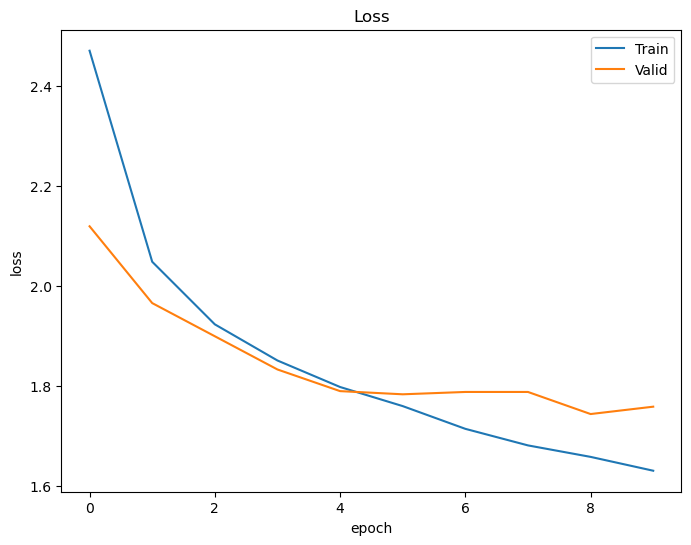

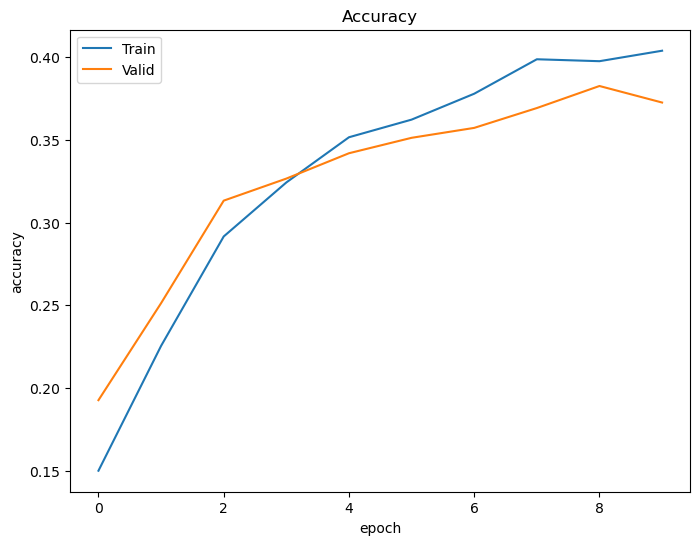

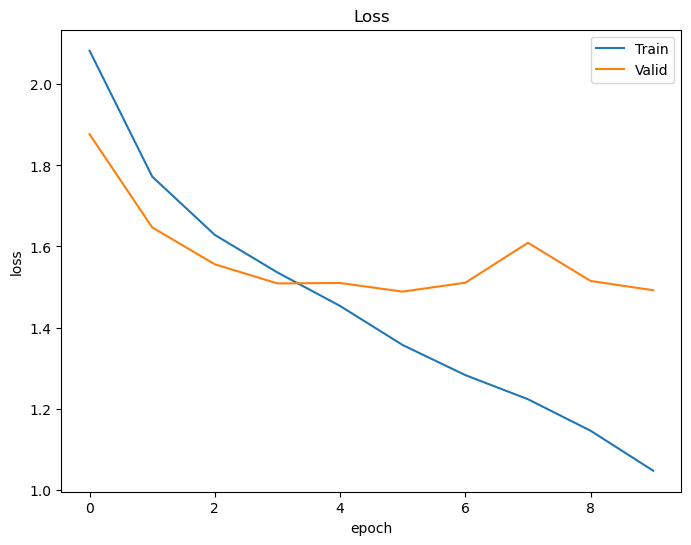

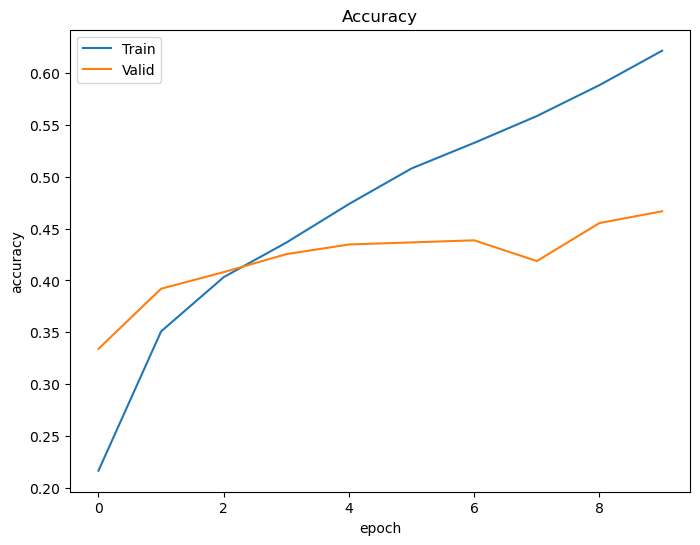

In [7]:
#from elice_utils import EliceUtils

#elice_utils = EliceUtils()

import tensorflow as tf
from tensorflow.keras import layers, Sequential, Input
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

SEED = 2021

def load_cifar10_dataset():
    train_X = np.load("./dataset/cifar10_train_X.npy")
    train_y = np.load("./dataset/cifar10_train_y.npy")
    test_X = np.load("./dataset/cifar10_test_X.npy")
    test_y = np.load("./dataset/cifar10_test_y.npy")
    
    train_X, test_X = train_X / 255.0, test_X / 255.0
    
    return train_X, train_y, test_X, test_y
    
def build_mlp_model(img_shape, num_classes=10):
    model = Sequential()

    model.add(Input(shape=img_shape))
    
    # TODO: [지시사항 1번] MLP 모델을 완성하세요.
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(4096, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))    

    return model

def build_cnn_model(img_shape, num_classes=10):
    model = Sequential()

    # TODO: [지시사항 2번] CNN 모델을 완성하세요.
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='SAME', input_shape=img_shape))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='SAME', activation=tf.nn.relu))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='SAME', activation=tf.nn.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size=2))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='SAME', strides=(2,2), activation=tf.nn.relu))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='SAME', strides=(2,2), activation=tf.nn.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    return model
    
def plot_history(hist):
    train_loss = hist.history["loss"]
    train_acc = hist.history["accuracy"]
    valid_loss = hist.history["val_loss"]
    valid_acc = hist.history["val_accuracy"]
    
    fig = plt.figure(figsize=(8, 6))
    plt.plot(train_loss)
    plt.plot(valid_loss)
    plt.title('Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Train', 'Valid'], loc='upper right')
    plt.savefig("loss.png")
    
    fig = plt.figure(figsize=(8, 6))
    plt.plot(train_acc)
    plt.plot(valid_acc)
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.savefig("accuracy.png")
    
def run_model(model, train_X, train_y, test_X, test_y, epochs=10):
    # TODO: [지시사항 3번] Adam optimizer를 설정하세요.
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    
    model.summary()
    # TODO: [지시사항 4번] 모델의 optimizer, 손실 함수, 평가 지표를 설정하세요.
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    # TODO: [지시사항 5번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = model.fit(train_X, train_y, epochs=10, batch_size=64, validation_split=0.2, shuffle=True, verbose=2)
    
    plot_history(hist)
    test_loss, test_acc = model.evaluate(test_X, test_y)
    print("Test Loss: {:.5f}, Test Accuracy: {:.3f}%".format(test_loss, test_acc * 100))
    
    return optimizer, hist

def main():
    tf.random.set_seed(SEED)
    np.random.seed(SEED)
    
    train_X, train_y, test_X, test_y = load_cifar10_dataset()
    img_shape = train_X[0].shape

    mlp_model = build_mlp_model(img_shape)
    cnn_model = build_cnn_model(img_shape)
    
    print("=" * 30, "MLP 모델", "=" * 30)
    run_model(mlp_model, train_X, train_y, test_X, test_y)
    
    print()
    print("=" * 30, "CNN 모델", "=" * 30)
    run_model(cnn_model, train_X, train_y, test_X, test_y)

if __name__ == "__main__":
    main()

In [9]:
train_X, train_y, test_X, test_y = load_cifar10_dataset()

(32, 32, 3)


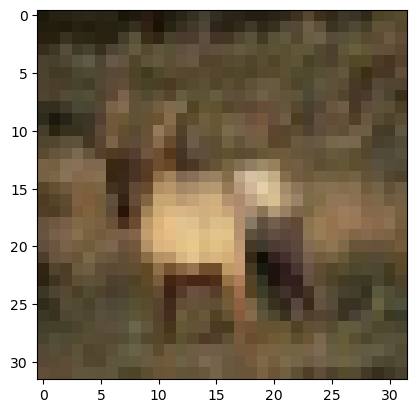

In [16]:
import matplotlib.pyplot as plt

print(train_X[3].shape)
plt.imshow(train_X[3])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_88 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_90 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_92 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,946 (406.04 KB)

 Trainable params: 103,946 (406.04 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
94/94 - 4s - 42ms/step - accuracy: 0.2483 - loss: 2.0456 - val_accuracy: 0.3173 - val_loss: 1.8085
Epoch 2/10
94/94 - 3s - 35ms/step - accuracy: 0.3768 - loss: 1.7096 - val_accuracy: 0.4120 - val_loss: 1.5922
Epoch 3/10
94/94 - 3s - 34ms/step - accuracy: 0.4380 - loss: 1.5408 - val_accuracy: 0.4540 - val_loss: 1.4822
Epoch 4/10
94/94 - 3s - 34ms/step - accuracy: 0.4935 - loss: 1.4159 - val_accuracy: 0.4707 - val_loss: 1.4189
Epoch 5/10
94/94 - 3s - 34ms/step - accuracy: 0.5272 - loss: 1.3135 - val_accuracy: 0.4913 - val_loss: 1.3820
Epoch 6/10
94/94 - 3s - 34ms/step - accuracy: 0.5552 - loss: 1.2321 - val_accuracy: 0.5047 - val_loss: 1.3586
Epoch 7/10
94/94 - 3s - 34ms/step - accuracy: 0.5937 - loss: 1.1341 - val_accuracy: 0.4760 - val_loss: 1.4446
Epoch 8/10
94/94 - 3s - 34ms/step - accuracy: 0.6337 - loss: 1.0342 - val_accuracy: 0.4773 - val_loss: 1.4952
Epoch 9/10
94/94 - 3s - 34ms/step - accuracy: 0.6645 - loss: 0.9449 - val_accuracy: 0.4707 - val_loss: 1.5610
Epoch

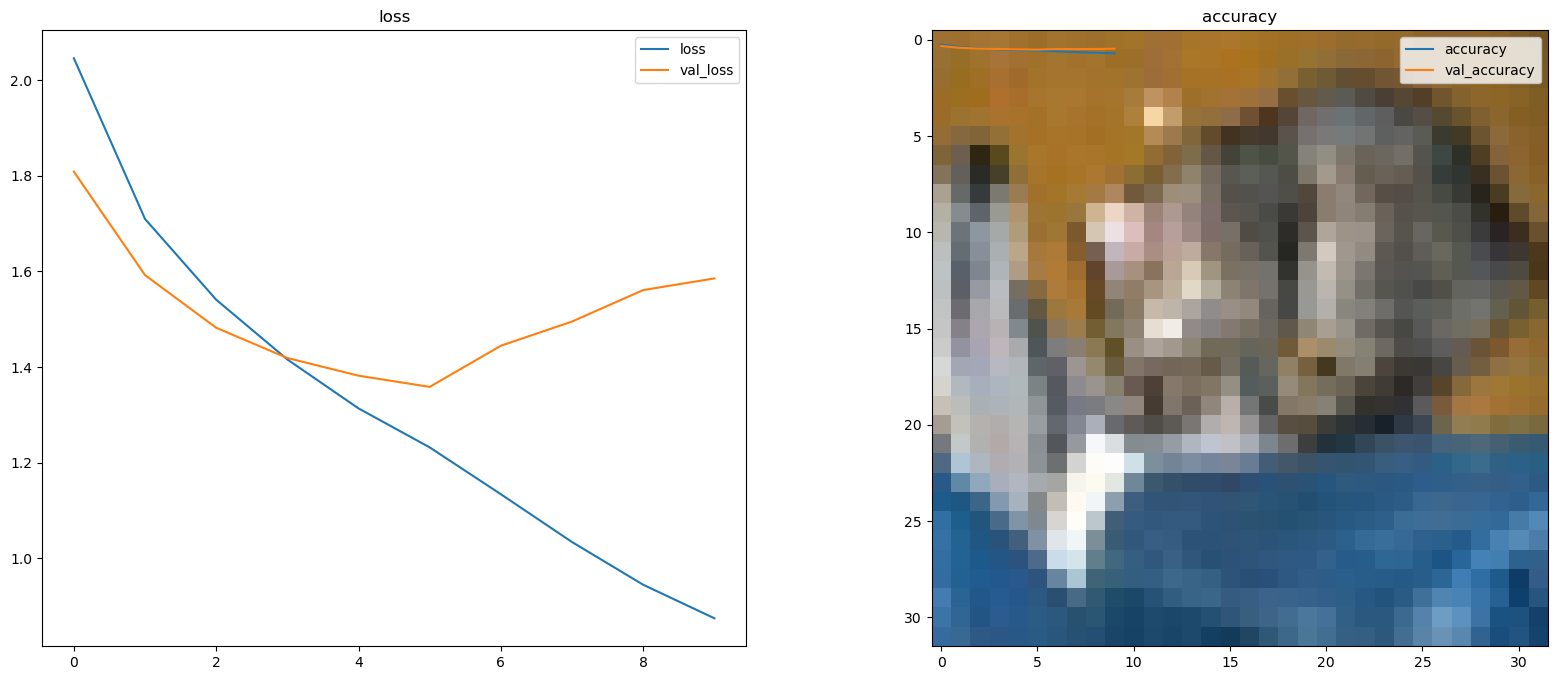

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
real: 3
predict: 3


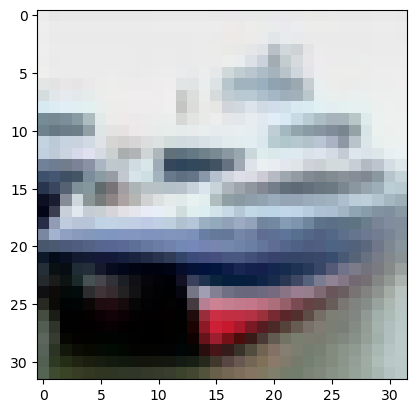

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
real: 8
predict: 8


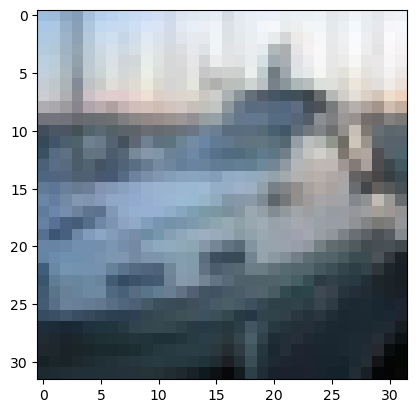

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
real: 8
predict: 8


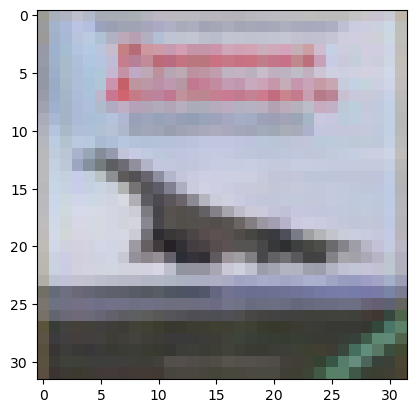

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
real: 0
predict: 8


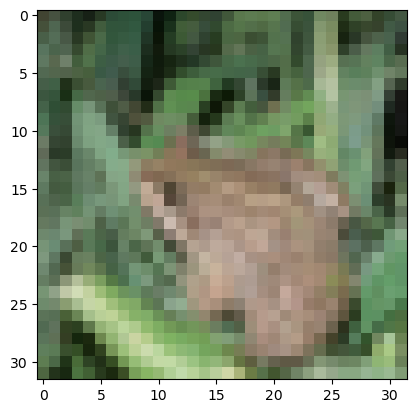

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
real: 6
predict: 6


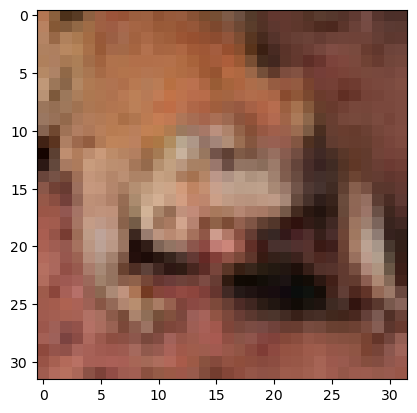

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
real: 6
predict: 6


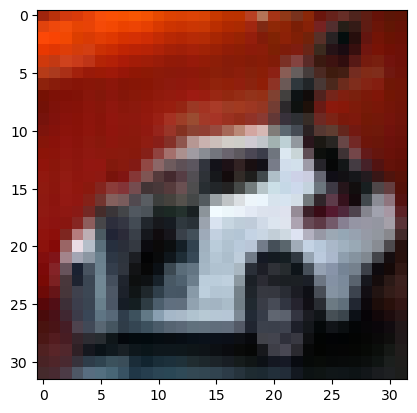

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
real: 1
predict: 3


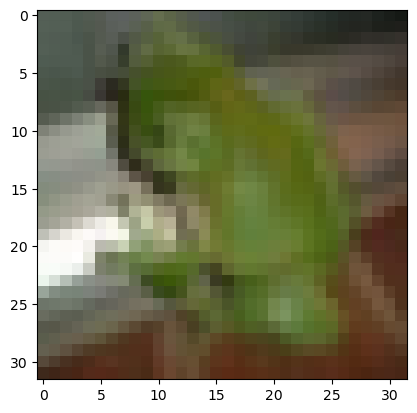

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
real: 6
predict: 2


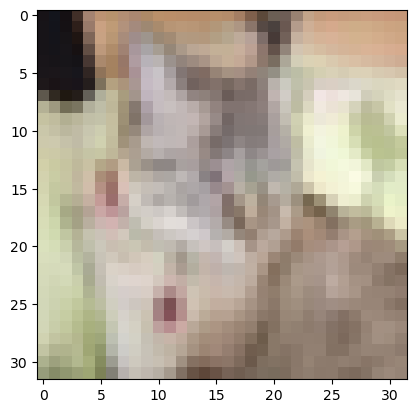

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
real: 3
predict: 3


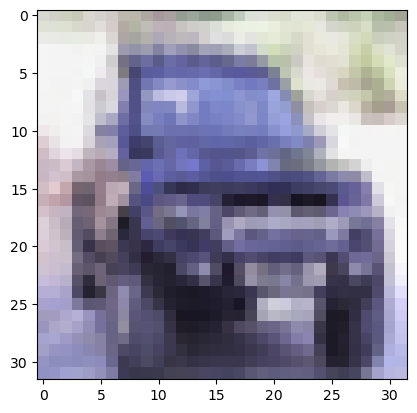

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
real: 1
predict: 1


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

def load_data():
    train_X = np.load("./dataset/cifar10_train_X.npy")
    train_y = np.load("./dataset/cifar10_train_y.npy")
    test_X = np.load("./dataset/cifar10_test_X.npy")
    test_y = np.load("./dataset/cifar10_test_y.npy")
    
    train_X, test_X = train_X/255., test_X/255.
    
    return train_X, train_y, test_X, test_y

def make_model(img_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='SAME', input_shape=img_shape))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='SAME', activation=tf.nn.relu))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='SAME', activation=tf.nn.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size=2))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='SAME', strides=(2,2), activation=tf.nn.relu))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='SAME', strides=(2,2), activation=tf.nn.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    return model

train_X, train_y, test_X, test_y = load_data()
img_shape= train_X[0].shape

model = make_model(img_shape)
print(model.summary())

optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=10, batch_size=64, validation_split=0.2, shuffle=True, verbose=2)

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('accuracy')

# CNN 예측시 입력 데이터의 형태는 (데이터 개수, width, height, channel) 형태가 되어야 한다.

for i in range(10):
    test_img = test_X[i]
    plt.imshow(test_img)
    plt.show()
    test_img = np.expand_dims(test_img, axis=0)
    pred_tmp = model.predict(test_img)
    pred = np.argmax(pred_tmp)
    print(f'real: {test_y[i][0]}')
    print(f'predict: {pred}')